In [1]:
# for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# for pre-processing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [3]:
# training dataset
train_df = pd.read_csv("C:/Users/chait/Downloads/application_train.csv/application_train.csv")
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# testing dataset
test_df = pd.read_csv("C:/Users/chait/Downloads/application_test.csv/application_test.csv")
test_df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [5]:
# all NaNs
print(f'Total training NaNs = {train_df.isnull().sum().sum()}')
print(f'Total Testing NaNs = {test_df.isnull().sum().sum()}')

Total training NaNs = 9152465
Total Testing NaNs = 1404419


In [6]:
# Only columns with NaNs count and percentage
columns = train_df.isnull().sum()[train_df.isnull().sum() != 0].keys()
nans_count = train_df.isnull().sum()[train_df.isnull().sum() != 0].values
nans_percentage = train_df.isnull().sum()[train_df.isnull().sum() != 0].values/train_df.shape[0]

# create a dataframe from the extracted info. 
nans_df = pd.DataFrame({'Column':columns, 'No. of NaNs':nans_count, '% of NaNs in Column':nans_percentage*100})
nans_df = nans_df.sort_values(by='% of NaNs in Column', ascending=False)
nans_df

,Column,No. of NaNs,% of NaNs in Column
41,COMMONAREA_MEDI,214865,69.872297
13,COMMONAREA_AVG,214865,69.872297
27,COMMONAREA_MODE,214865,69.872297
49,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
35,NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...,...
7,EXT_SOURCE_2,660,0.214626
1,AMT_GOODS_PRICE,278,0.090403
0,AMT_ANNUITY,12,0.003902
5,CNT_FAM_MEMBERS,2,0.000650


In [7]:
# sum of all duplicated records in data
train_df.duplicated().sum()

0

In [8]:
# target value counts per each class
print('Count of Each Class\n' + '-'*20)
print(train_df['TARGET'].value_counts())

Count of Each Class
--------------------
0    282686
1     24825
Name: TARGET, dtype: int64


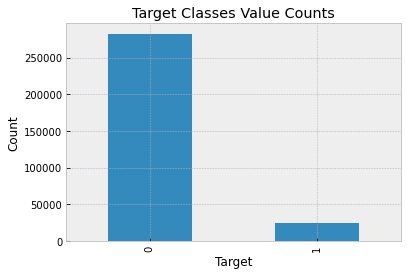

In [9]:
# visualize TARGET value counts
train_df['TARGET'].value_counts().plot(kind='bar');
plt.title('Target Classes Value Counts')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [10]:
# all columns dtypes
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# go deeper with object columns and extract the unique classes in each column
## create a dataframe with object dtype columns
unique_df = pd.DataFrame(train_df.select_dtypes('object').nunique()).reset_index()
unique_df.columns = ['Column','No. of Unique Values']

## extract the unique classes in each column
unique_df['Unique Values'] = unique_df['Column'].apply(lambda x: train_df[x].unique())
unique_df.sort_values(by='No. of Unique Values')

,Column,No. of Unique Values,Unique Values
0,NAME_CONTRACT_TYPE,2,"[Cash loans, Revolving loans]"
2,FLAG_OWN_CAR,2,"[N, Y]"
3,FLAG_OWN_REALTY,2,"[Y, N]"
15,EMERGENCYSTATE_MODE,2,"[No, nan, Yes]"
1,CODE_GENDER,3,"[M, F, XNA]"
13,HOUSETYPE_MODE,3,"[block of flats, nan, terraced house, specific..."
12,FONDKAPREMONT_MODE,4,"[reg oper account, nan, org spec account, reg ..."
6,NAME_EDUCATION_TYPE,5,"[Secondary / secondary special, Higher educati..."
7,NAME_FAMILY_STATUS,6,"[Single / not married, Married, Civil marriage..."
8,NAME_HOUSING_TYPE,6,"[House / apartment, Rented apartment, With par..."


In [12]:
# check CODE_GENDER column in training and testing datasets
print('Train Dataset')
print(train_df['CODE_GENDER'].value_counts())

print('\nTest Dataset')
print(test_df['CODE_GENDER'].value_counts())

Train Dataset
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Test Dataset
F    32678
M    16066
Name: CODE_GENDER, dtype: int64


In [13]:
# Top 5 Columns with Positive Correlation with our TARGET 
print('Top 5 Columns with Positive Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().tail(5))

# Negative ones
print('\nTop 5 Columns with Negative Correlation with TARGET\n', '-'*50)
print(train_df.corr()['TARGET'].sort_values().head(5))

Top 5 Columns with Positive Correlation with TARGET
 --------------------------------------------------
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Top 5 Columns with Negative Correlation with TARGET
 --------------------------------------------------
EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


In [14]:
# extract continuous columns
all_numerical_cols = list(train_df.select_dtypes(exclude='object').columns)

# continuous  columns are all columns excluding target and flags columns
cont_cols = [col for col in all_numerical_cols if col!="TARGET" and col[:5]!='FLAG_']
print(f'No. of continuous features = {len(cont_cols)}')

No. of continuous features = 79


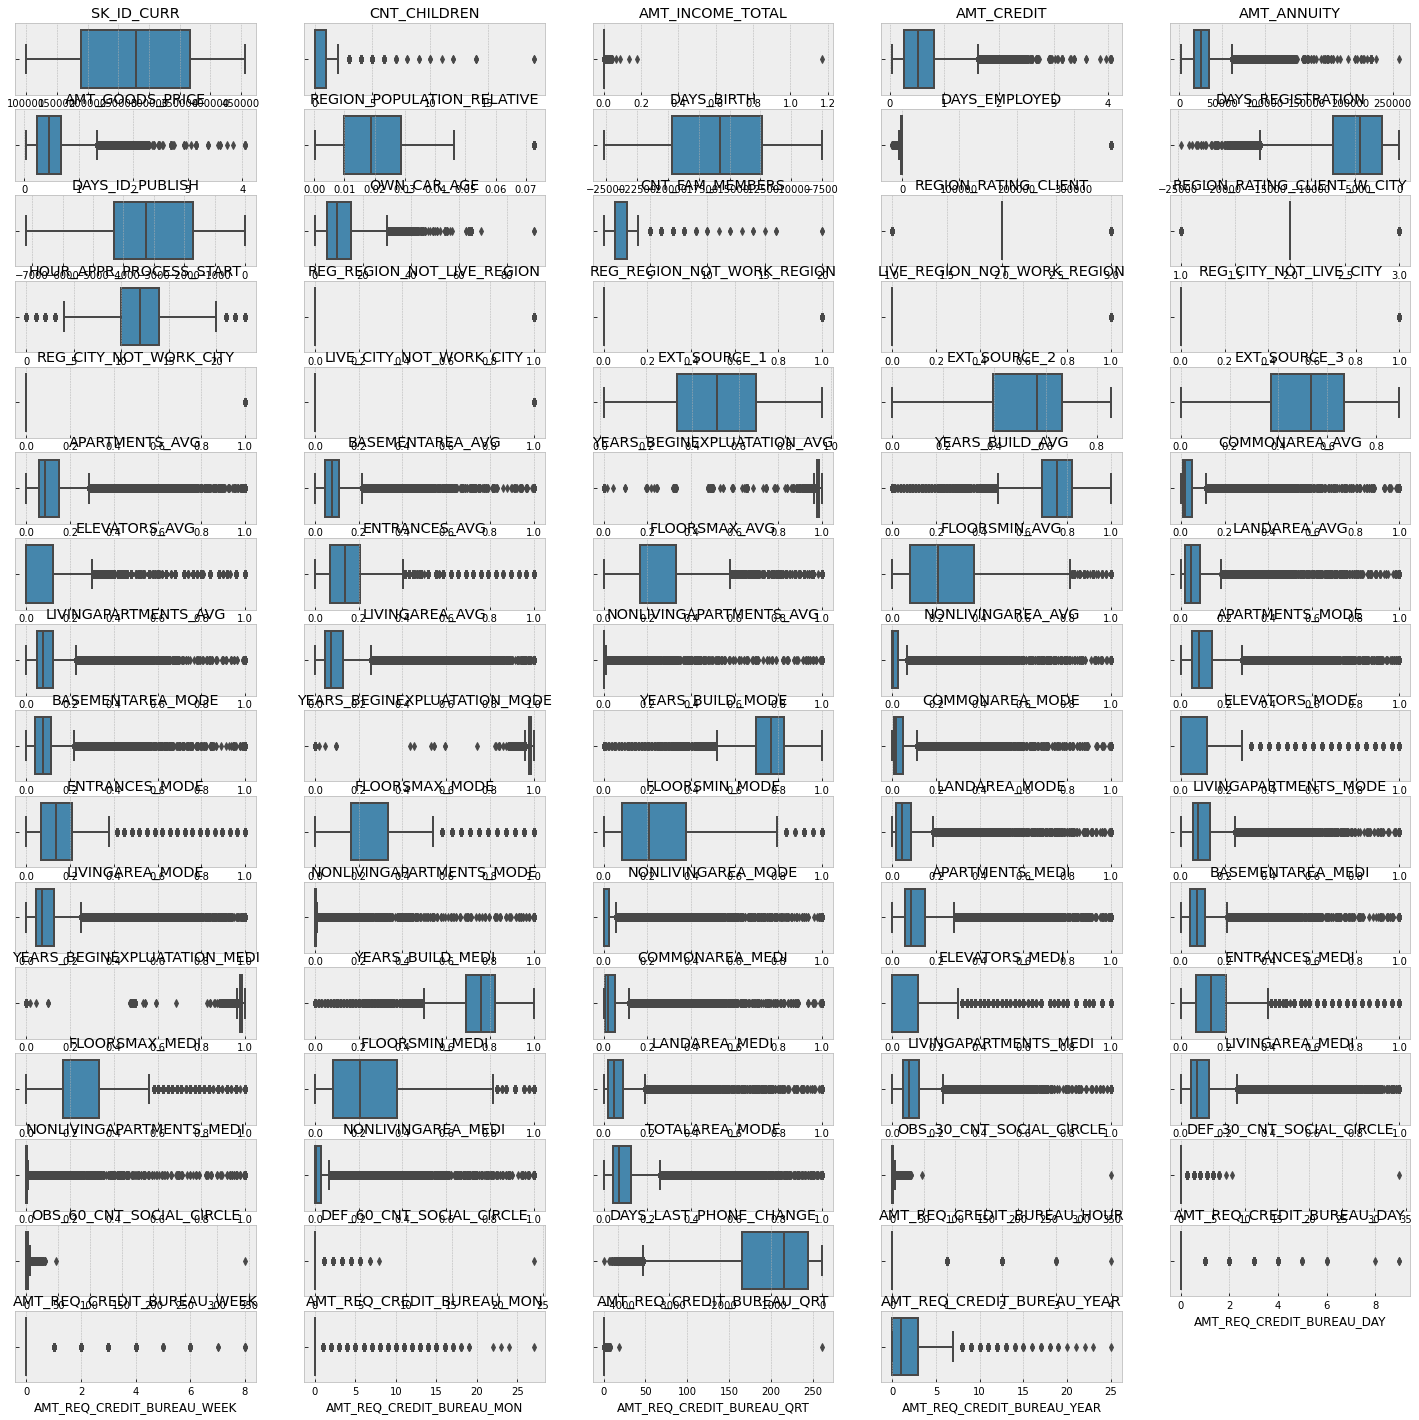

In [15]:
# draw boxplots for each continuous column
plt.figure(figsize=(25, 25))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.boxplot(data=train_df, x=col)
    plt.title(col)

In [16]:
# 3- The maximum age of a client is 69 year

## extract dataframe with DAYS_BIRTH and TARGET only
susp_df2 = train_df[['DAYS_BIRTH','TARGET']]

## create column represnts the age in years
susp_df2['YEARS_BIRTH'] = np.abs(susp_df2['DAYS_BIRTH']) / 365.25

## show datafame
display(susp_df2.sort_values(by='YEARS_BIRTH', ascending=False))

## show the value counts of those who are aged > 65 with respect to target
display(susp_df2[(susp_df2['YEARS_BIRTH']>65)]['TARGET'].value_counts())

,DAYS_BIRTH,TARGET,YEARS_BIRTH
265026,-25229,0,69.073238
124430,-25201,0,68.996578
63316,-25201,0,68.996578
143266,-25200,0,68.993840
169562,-25197,0,68.985626
...,...,...,...
137182,-7678,0,21.021218
170384,-7676,0,21.015743
53702,-7676,0,21.015743
168135,-7673,0,21.007529


0    7588
1     288
Name: TARGET, dtype: int64

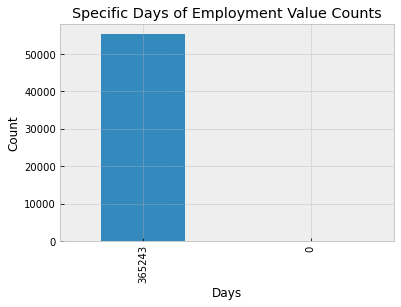

In [17]:
# 4- The maximum value in days employed is positive not negative + it's about 100 years

## visualize the clients days of employment >=0
train_df[train_df['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts().plot(kind='bar');
plt.title('Specific Days of Employment Value Counts')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

In [18]:
# the percentage of this value in our dataset
value_perctage = len(train_df[train_df['DAYS_EMPLOYED']==365243])/len(train_df) * 100
print('Records with this value represent {:.2f}% of all data.'.format(value_perctage))

Records with this value represent 18.01% of all data.


In [19]:
# 5- A clients own car with 91 age! was manufactured in 1927!

## show the value counts of those who own cars aged > 60 with respect to target
display(train_df[train_df['OWN_CAR_AGE']>60][['OWN_CAR_AGE','TARGET']]['TARGET'].value_counts())

## show who owns car aged > 70 and its target class
display(train_df[train_df['OWN_CAR_AGE']>70][['OWN_CAR_AGE','TARGET']])

0    3059
1     280
Name: TARGET, dtype: int64

,OWN_CAR_AGE,TARGET
271741,91.0,1
294131,91.0,0


In [20]:
 #The minimum days before application did a client change phone is zero!

## extract dataframe with DAYS_LAST_PHONE_CHANGE = 0
susp_df3 = train_df[train_df['DAYS_LAST_PHONE_CHANGE']==0]
print('There\'re {} records with 0 value in DAYS_LAST_PHONE_CHANGE column'.format(len(susp_df3)))
print('These records represent {:.2f}% of all data.'.format(len(susp_df3)/len(train_df) * 100))

There're 37672 records with 0 value in DAYS_LAST_PHONE_CHANGE column
These records represent 12.25% of all data.


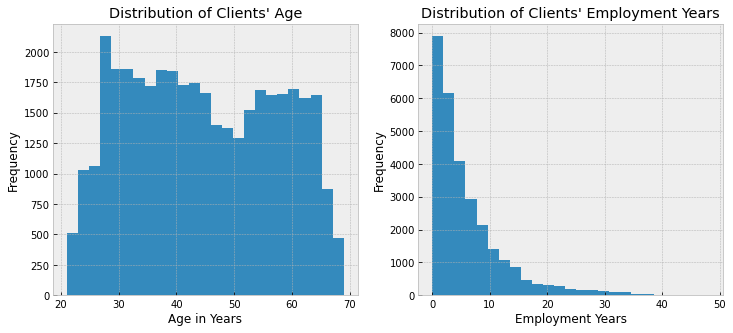

In [21]:
# go deeper with the distributions

## convert birth and employment days into years
susp_df3['YEARS_BIRTH'] = susp_df3['DAYS_BIRTH']/-365.25
susp_df3['YEARS_EMPLOYED'] = susp_df3['DAYS_EMPLOYED']/-365.25

plt.figure(figsize=(12,5))
## age histogram for clients with DAYS_LAST_PHONE_CHANGE = 0
plt.subplot(1, 2, 1)
susp_df3['YEARS_BIRTH'].hist(bins=25)
plt.title('Distribution of Clients\' Age')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')

## employment histogram for clients with DAYS_LAST_PHONE_CHANGE = 0 without the wrong value '365243'
plt.subplot(1, 2, 2)
susp_df3[susp_df3['YEARS_EMPLOYED']!=(365243/-365.25)]['YEARS_EMPLOYED'].hist(bins=25)
plt.title('Distribution of Clients\' Employment Years')
plt.xlabel('Employment Years')
plt.ylabel('Frequency')
plt.show()

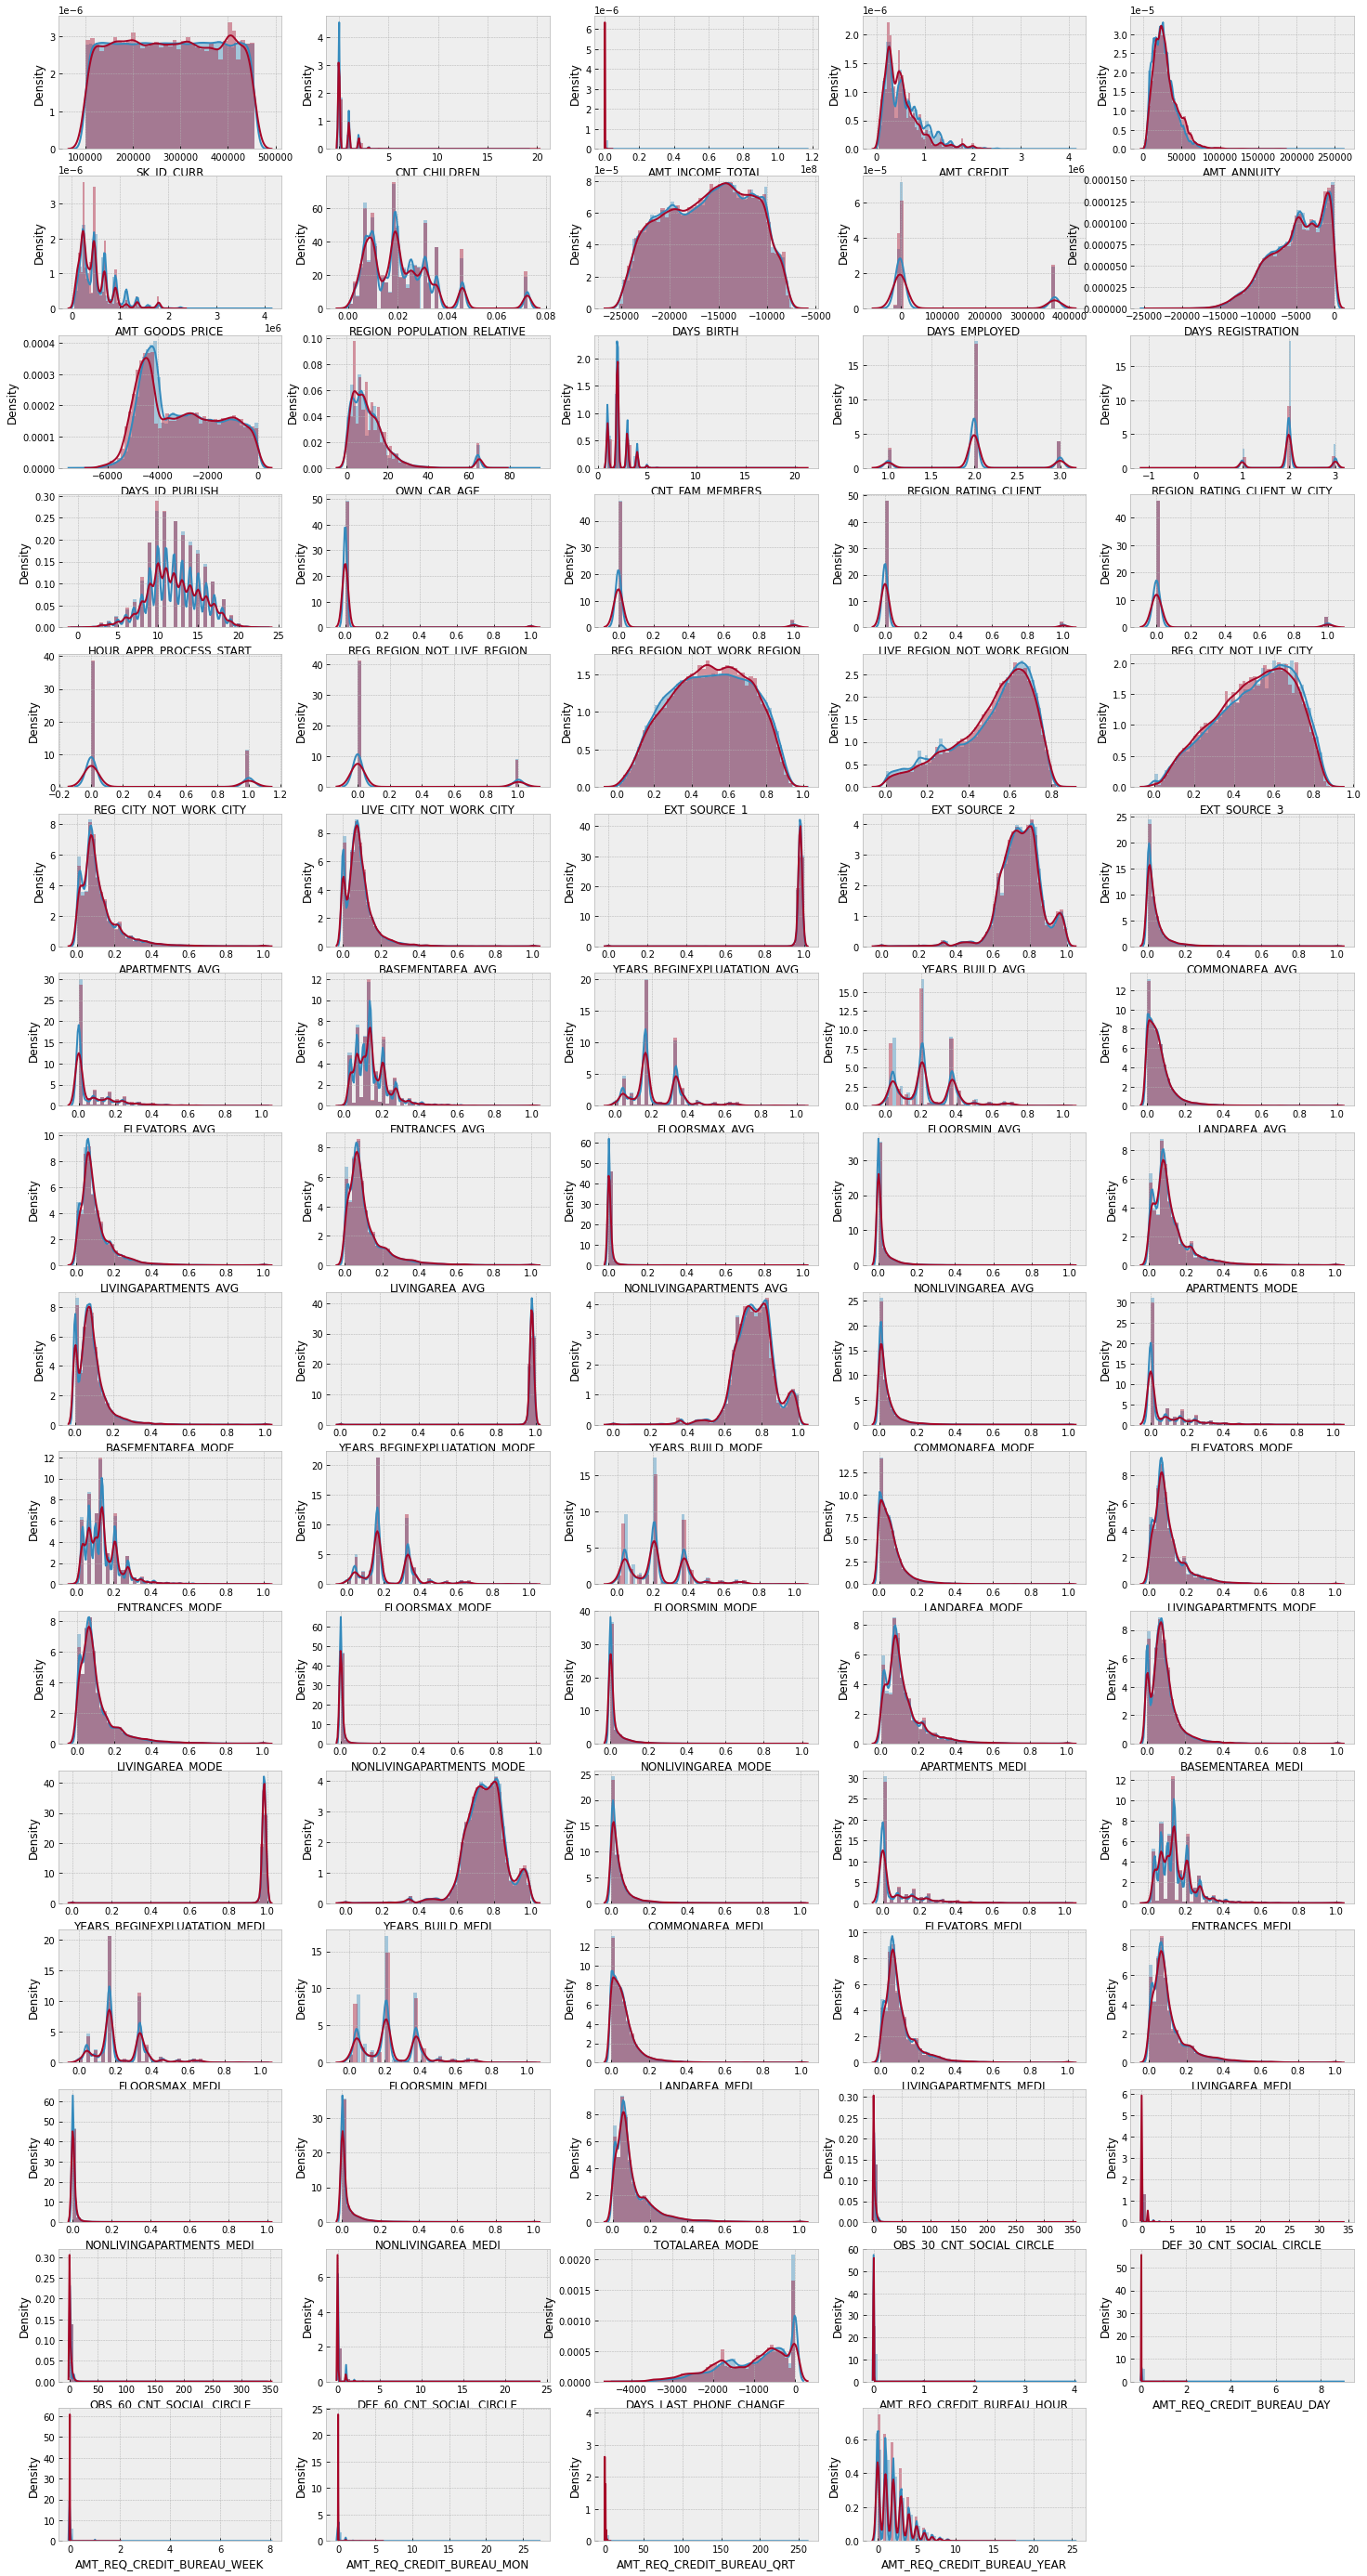

In [22]:
# create a distribution plot for each continuous feature
plt.figure(figsize=(25, 50))
for i, col in enumerate(cont_cols):
    plt.subplot(16, 5, i+1)
    sns.distplot(train_df[col])
    sns.distplot(test_df[col])

Object `loans` not found.


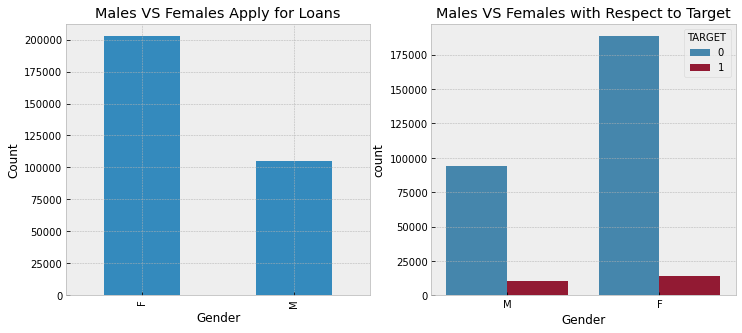

In [23]:
 Which gender applys more for loans?
# Is there relation between the gender and the ability to repay?

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
train_df[train_df['CODE_GENDER']!='XNA']['CODE_GENDER'].value_counts().plot(kind='bar', title='Males VS Females Apply for Loans');
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=train_df[train_df['CODE_GENDER']!='XNA'], x='CODE_GENDER', hue='TARGET');
plt.title('Males VS Females with Respect to Target')
plt.xlabel('Gender')
plt.show()

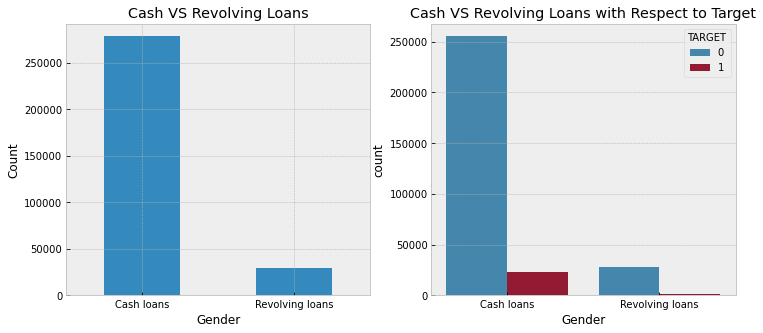

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
train_df['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar', title='Cash VS Revolving Loans');
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.countplot(data=train_df, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Cash VS Revolving Loans with Respect to Target')
plt.xlabel('Gender')
plt.show()

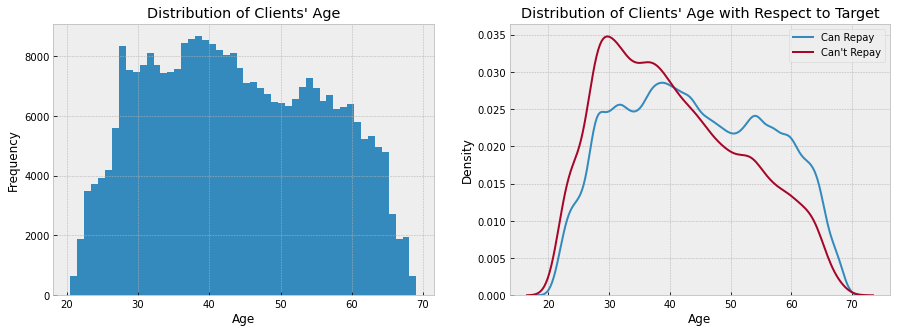

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
(train_df['DAYS_BIRTH']/-365.25).plot(kind='hist', bins=50, title='Distribution of Clients\' Age');
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
proper_day_birth_df = train_df[['DAYS_BIRTH', 'TARGET']]
proper_day_birth_df['DAYS_BIRTH'] = proper_day_birth_df['DAYS_BIRTH']/-365.25
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==0]['DAYS_BIRTH'], hist=False, label='Can Repay');
sns.distplot(proper_day_birth_df[proper_day_birth_df['TARGET']==1]['DAYS_BIRTH'], hist=False, label='Can\'t Repay');
plt.title('Distribution of Clients\' Age with Respect to Target')
plt.xlabel('Age')
plt.legend();
plt.show()

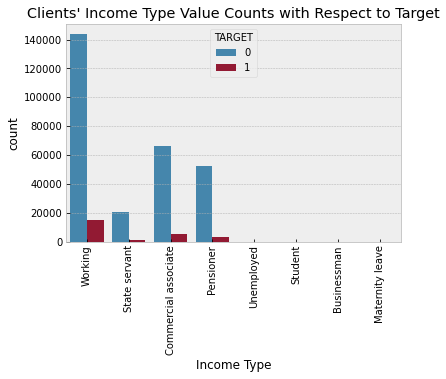

NAME_INCOME_TYPE      TARGET
Businessman           0             10
Commercial associate  0          66257
                      1           5360
Maternity leave       0              3
                      1              2
Pensioner             0          52380
                      1           2982
State servant         0          20454
                      1           1249
Student               0             18
Unemployed            0             14
                      1              8
Working               0         143550
                      1          15224
Name: TARGET, dtype: int64

In [26]:
# what's most income type of clients?

ax = sns.countplot(data=train_df, x='NAME_INCOME_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' Income Type Value Counts with Respect to Target')
plt.xlabel('Income Type')
plt.show()

print('\n'*2)
train_df.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts()

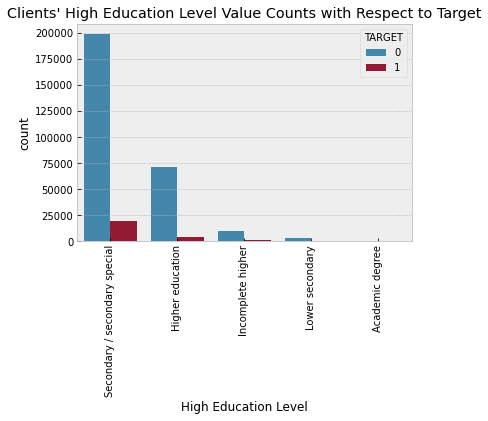

NAME_EDUCATION_TYPE            TARGET
Academic degree                0            161
                               1              3
Higher education               0          70854
                               1           4009
Incomplete higher              0           9405
                               1            872
Lower secondary                0           3399
                               1            417
Secondary / secondary special  0         198867
                               1          19524
Name: TARGET, dtype: int64

In [27]:
# what's most high education degree for clients?

ax = sns.countplot(data=train_df, x='NAME_EDUCATION_TYPE', hue='TARGET');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title('Clients\' High Education Level Value Counts with Respect to Target')
plt.xlabel('High Education Level')
plt.show()

print('\n'*2)
train_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts()

In [28]:
# before start cleaning, we keep copy of datasets
train_copy = train_df.copy()
test_copy = test_df.copy()

In [29]:
# extract these columns from nans_df
drop_cols = nans_df[nans_df['% of NaNs in Column']>40]['Column'].tolist()
keep_cols = [col for col in train_df.columns if col not in drop_cols]

# extract the new train dataframe
train_df = train_df[keep_cols]

# remove Target from keep_cols and create the new test dataframe
keep_cols.remove('TARGET')
test_df = test_df[keep_cols]

In [30]:
# check the new datasets shapes
print(train_df.shape)
print(test_df.shape)

(307511, 73)
(48744, 72)
